In [5]:
import requests
import pandas as pd
from pandas import json_normalize


# Define the Frankfurter API URL for exchange rates
api_url = 'https://api.frankfurter.app/2013-01-01..2023-08-31'

# Make a GET request to the Frankfurter API
response = requests.get(api_url)


frame = response.json()
df=pd.DataFrame(frame)

df_rates= json_normalize(df['rates'])

df=df.reset_index()

df=df.drop('rates', axis=1)

df = pd.concat([df,df_rates], axis=1)

df

,index,amount,base,start_date,end_date,AUD,BGN,BRL,CAD,CHF,...,PLN,RON,RUB,SEK,SGD,THB,TRY,USD,ZAR,ISK
0,2012-12-31,1.0,EUR,2012-12-31,2023-08-28,1.2534,1.9558,2.6831,1.2960,1.20910,...,4.0925,4.4281,39.796,8.5471,1.6072,39.909,2.3412,1.3125,11.2497,NaN
1,2013-01-07,1.0,EUR,2012-12-31,2023-08-28,1.2454,1.9558,2.6658,1.2930,1.21060,...,4.1083,4.3994,39.793,8.5756,1.6094,39.818,2.3299,1.3114,11.3051,NaN
2,2013-01-14,1.0,EUR,2012-12-31,2023-08-28,1.2649,1.9558,2.7182,1.3157,1.23720,...,4.1274,4.3564,40.374,8.6386,1.6330,39.884,2.3541,1.3327,11.7232,NaN
3,2013-01-21,1.0,EUR,2012-12-31,2023-08-28,1.2713,1.9558,2.7238,1.3324,1.24100,...,4.1750,4.3650,40.287,8.6904,1.6409,39.804,2.3626,1.3358,11.9565,NaN
4,2013-01-28,1.0,EUR,2012-12-31,2023-08-28,1.2985,1.9558,2.7009,1.3572,1.23950,...,4.1961,4.3848,40.662,8.6231,1.6743,40.348,2.3862,1.3522,12.1687,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,2023-07-31,1.0,EUR,2012-12-31,2023-08-28,1.6625,1.9558,5.2693,1.4605,0.96096,...,4.4386,4.9386,NaN,11.6723,1.4675,37.779,29.5870,1.0971,20.0750,144.58
553,2023-08-07,1.0,EUR,2012-12-31,2023-08-28,1.6788,1.9558,5.3754,1.4748,0.96174,...,4.4445,4.9461,NaN,11.7255,1.4787,38.417,29.6860,1.0984,20.6830,144.74
554,2023-08-14,1.0,EUR,2012-12-31,2023-08-28,1.6913,1.9558,5.4108,1.4724,0.95850,...,4.4645,4.9401,NaN,11.8625,1.4802,38.539,29.5330,1.0908,20.8180,144.18
555,2023-08-21,1.0,EUR,2012-12-31,2023-08-28,1.6872,1.9558,5.3345,1.4693,0.95606,...,4.4732,4.9388,NaN,11.8982,1.4709,38.047,29.1640,1.0850,20.3370,143.34


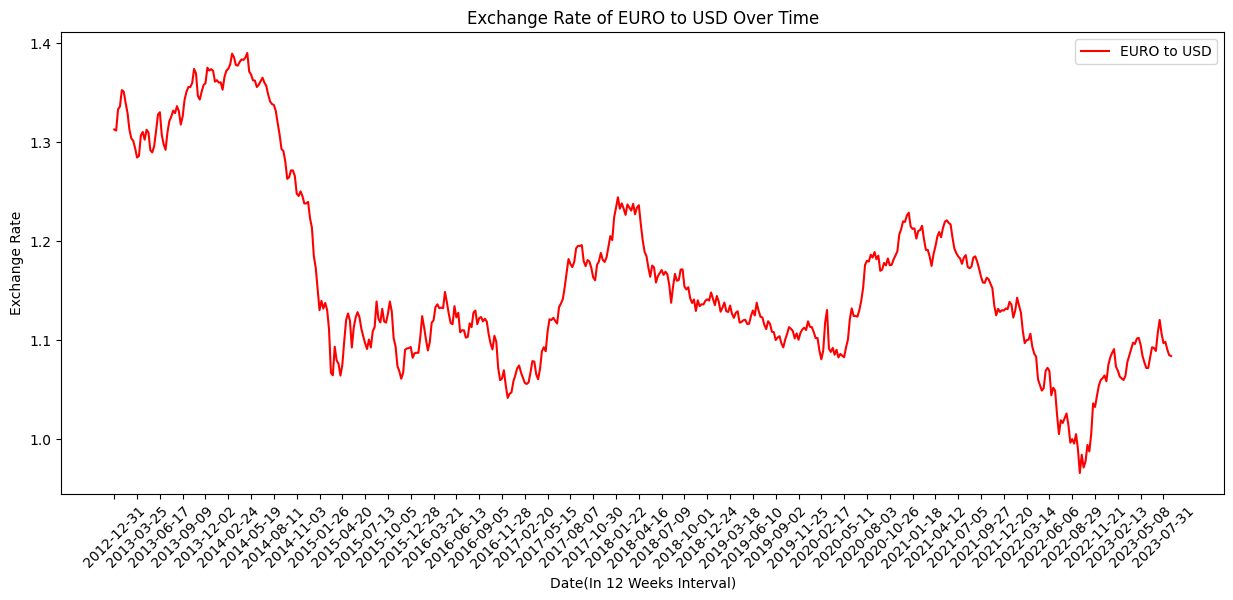

In [6]:
#QUESTION 1
# HOW HAS THE ECXCHANGE RATE OF THE EURO(EUR)AGAINST THE US DOLLAR (USD)CHANGEED OVER TIME


import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
plt.plot(df['index'],df['USD'],label = 'EURO to USD',color ='red')
plt.title('Exchange Rate of EURO to USD Over Time')
plt.xlabel('Date(In 12 Weeks Interval)')
plt.ylabel('Exchange Rate')
plt.xticks(df['index'][::12])
plt.xticks(rotation = 45)
plt.legend()
plt.show()

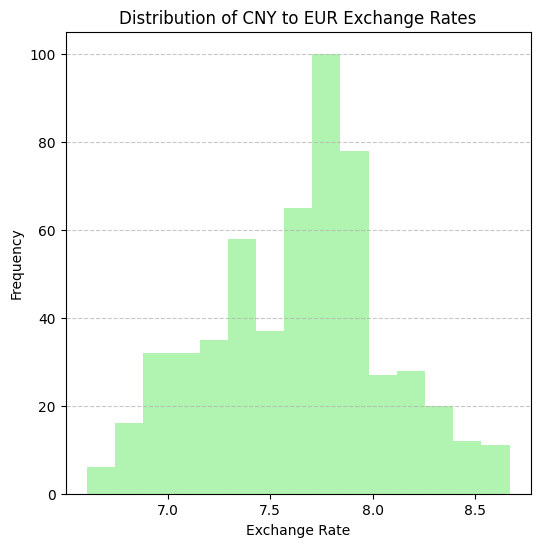

In [7]:

#2. What is the distribution of exchange rates for the Chinese Yuan (CNY) against the Euro (EUR)?
#Visualization: Histogram or kernel density plot for the distribution of CNY to EUR exchange rates


plt.figure(figsize=(6, 6))
plt.hist(df['CNY'],bins=15, color='LIGHTGREEN', alpha=0.7)
plt.title('Distribution of CNY to EUR Exchange Rates')
plt.xlabel('Exchange Rate')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


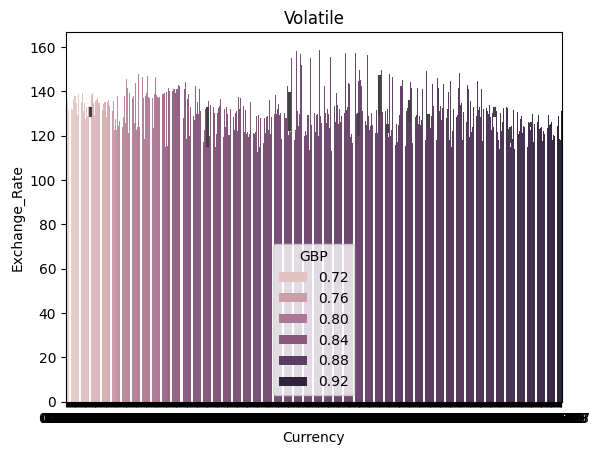

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


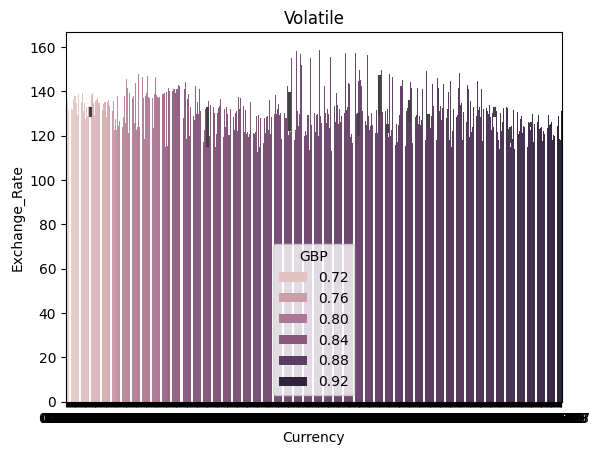

In [8]:
#3. Between the Great British Pound (GBP) and the Japanese Yen (JPY) determine which country's currency is more volatile
# Visualization: Bar chart comparing the volatility of the selected currencies.
import seaborn as sns

sns.barplot(data = sns.load_dataset('iris'), x = df['GBP'], y = df['JPY'], hue = df['GBP'])
plt.xlabel('Currency')
plt.ylabel('Exchange_Rate')
plt.title('Volatile')
plt.show()

#3. Between the Great British Pound (GBP) and the Japanese Yen (JPY) determine which country's currency is more volatile
# Visualization: Bar chart comparing the volatility of the selected currencies.
import seaborn as sns

sns.barplot(data = sns.load_dataset('iris'), x = df['GBP'], y = df['JPY'], hue = df['GBP'])
plt.xlabel('Currency')
plt.ylabel('Exchange_Rate')
plt.title('Volatile')
plt.show()